# Diabetes Dataset: MLP model

Oscar Miranda Escalante A01630791

In [1]:
import sys
sys.path.append('/Users/oscar/Local/diabetes_model')

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

from modules.dataset import DiabetesDataset

torch.manual_seed(0)

In [3]:

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# force cpu (mps not compatible)
device = "cpu"

print(f"Using {device} device")

Using cpu device


## Load the data

In [4]:
path = '../data/diabetes.txt'
diabetes_dataset = DiabetesDataset(path=path, normalize=True)

# Train/test split
train_size = int(0.8 * len(diabetes_dataset))
test_size = len(diabetes_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(diabetes_dataset, [train_size, test_size])

## Model definition

In [5]:
class MLP(nn.Module):
    def __init__(self, in_features, h_features, out_features) -> None:
        super(MLP, self).__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(in_features, h_features),
            nn.Linear(h_features, h_features),
            nn.Linear(h_features, out_features)
        )

    def forward(self, x):
        out = self.linear_stack(x)
        return out


In [6]:
# Feature dimensions
in_size = len(diabetes_dataset[0][0])
h_size = 64
out_size = 1

# Instantiate model
model = MLP(in_size, h_size, out_size).to(device)

## Training

In [7]:
def train(data, n_epochs, criterion, optimizer, loss_history):
    X_train, y_train = data[:]

    for epoch in range(n_epochs):
        optimizer.zero_grad()
        
        # Forward
        y_hat = model(X_train)

        # Loss
        loss = criterion(y_hat, y_train)
        loss_history.append(loss.item())

        # Gradients
        loss.backward()

        # Update params
        optimizer.step()

        print(f'epoch {epoch+1}, loss {loss.item()}')

Using SGD optimizer

In [8]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mse_history = []

train(train_dataset, 100, criterion, optimizer, mse_history)


epoch 1, loss 28889.705078125
epoch 2, loss 28713.18359375
epoch 3, loss 28518.623046875
epoch 4, loss 28267.24609375
epoch 5, loss 27932.24609375
epoch 6, loss 27496.03125
epoch 7, loss 26946.21484375
epoch 8, loss 26274.609375
epoch 9, loss 25479.373046875
epoch 10, loss 24568.255859375
epoch 11, loss 23562.48828125
epoch 12, loss 22496.466796875
epoch 13, loss 21407.5234375
epoch 14, loss 20330.994140625
epoch 15, loss 19286.0859375
epoch 16, loss 18268.728515625
epoch 17, loss 17247.849609375
epoch 18, loss 16166.1455078125
epoch 19, loss 14975.12890625
epoch 20, loss 13661.0322265625
epoch 21, loss 12247.1923828125
epoch 22, loss 10779.15625
epoch 23, loss 9326.75390625
epoch 24, loss 7994.81298828125
epoch 25, loss 6901.671875
epoch 26, loss 6125.64501953125
epoch 27, loss 5633.77783203125
epoch 28, loss 5286.083984375
epoch 29, loss 4947.875
epoch 30, loss 4579.72900390625
epoch 31, loss 4235.9140625
epoch 32, loss 4003.784423828125
epoch 33, loss 3922.86328125
epoch 34, loss 39

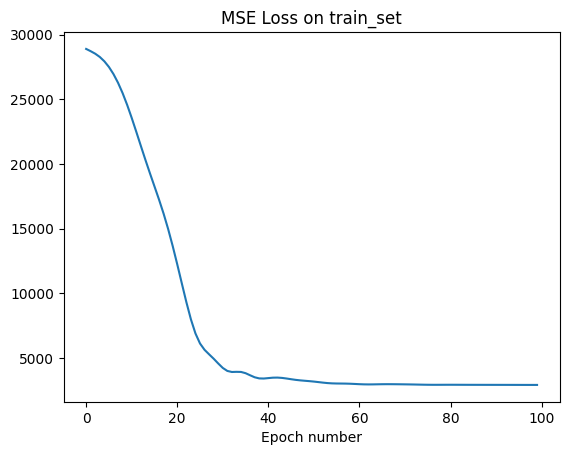

In [9]:
plt.title("MSE Loss on train_set")
plt.xlabel("Epoch number")
plt.plot(mse_history)

## Testing

Mean Squared Error (MSE) using test_set: 2747.3909
Root Mean Squared Error (RMSE) using test_set: 52.4156


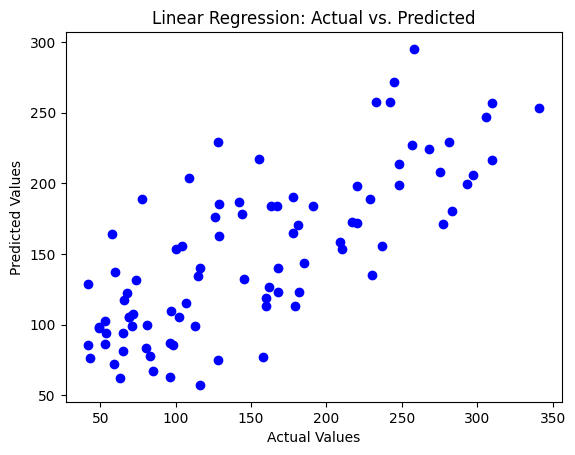

In [10]:
with torch.no_grad():
    X_test, y_test = test_dataset[:]
    y_hat = model(X_test)
    mse = criterion(y_hat, y_test)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE) using test_set: {mse.item():.4f}")
    print(f"Root Mean Squared Error (RMSE) using test_set: {rmse:.4f}")

    plt.scatter(y_test, y_hat, color='blue', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs. Predicted')
    plt.show()
    